<a href="https://colab.research.google.com/github/aumit210780/Final_Project_WM-ASDS04/blob/main/Final_Project_WM_ASDS04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will perform a regression task to predict car prices using the Automobile dataset available at the UCI Machine Learning Repository. This dataset contains various features of automobiles like make, fuel type, body style, engine size, horsepower, and others.

Dataset: https://archive.ics.uci.edu/ml/datasets/automobile

1. Importing libraries and loading the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
column_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
data = pd.read_csv(url, header=None, names=column_names, na_values="?")


2. Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

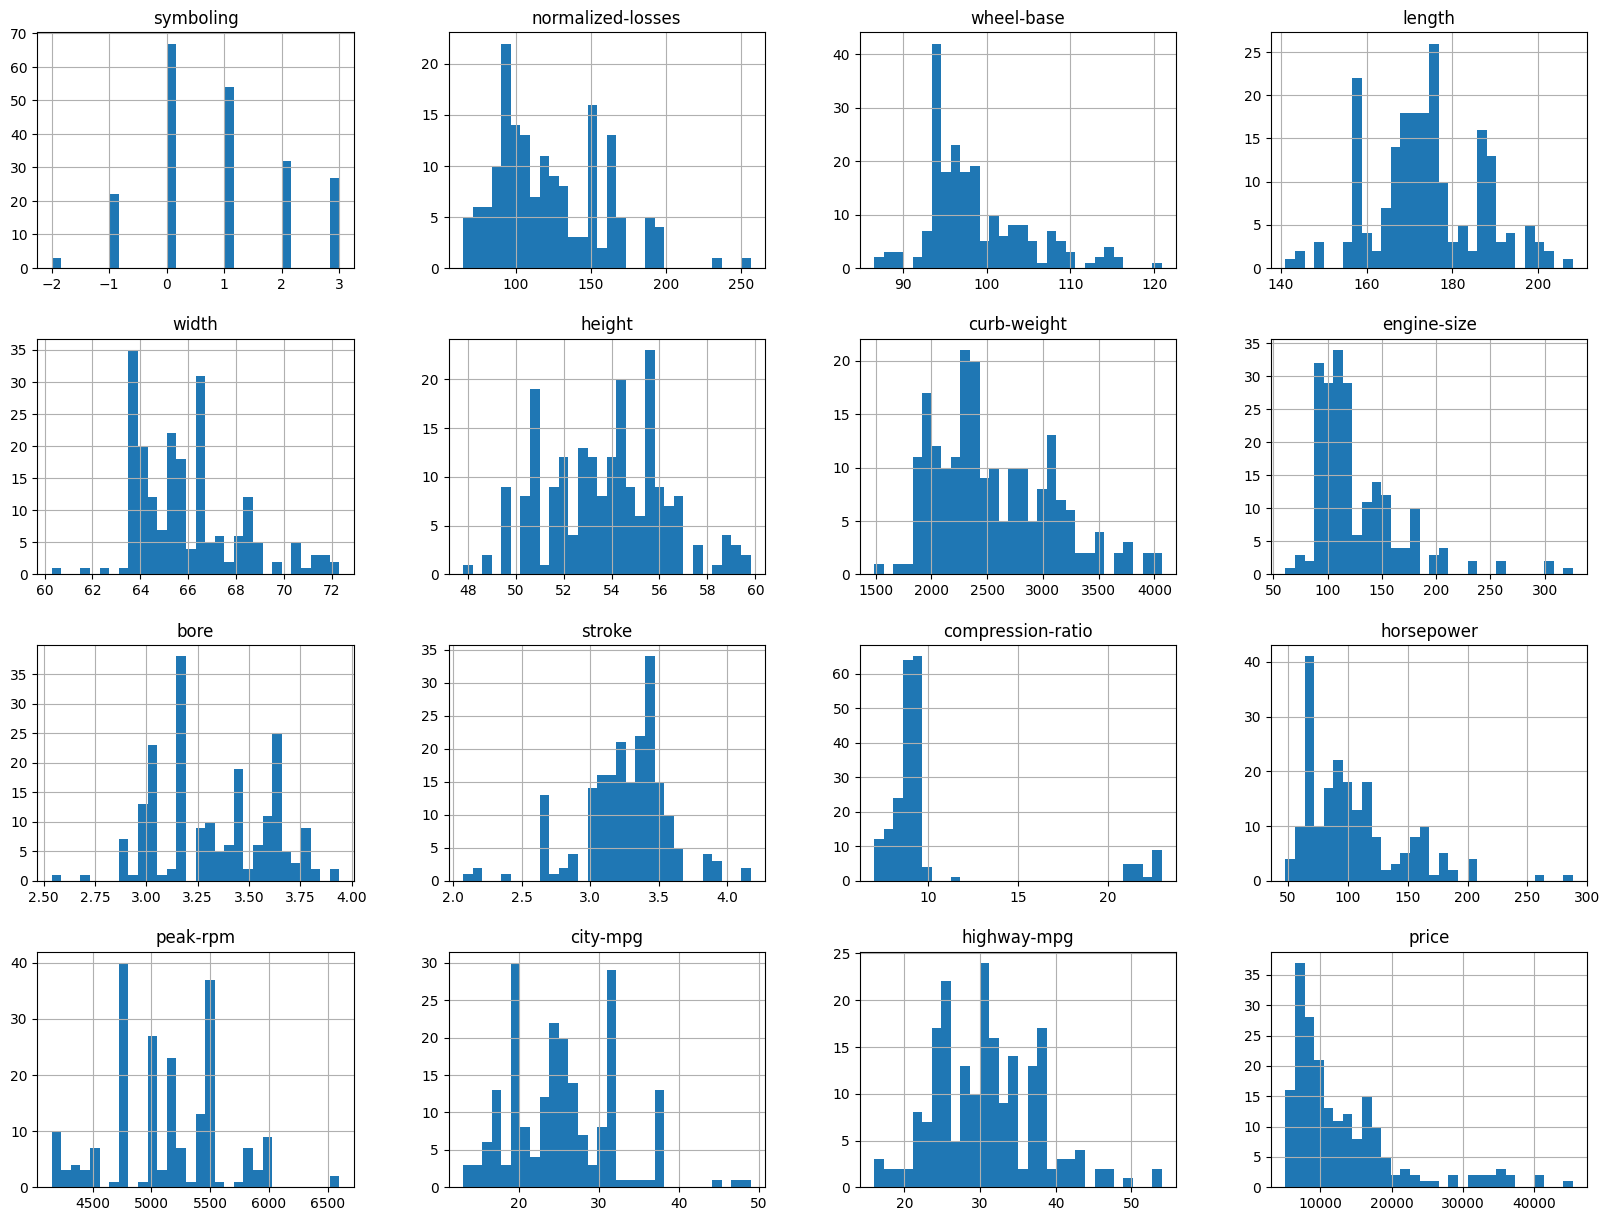

<ipython-input-2-d6cd0fc0d779>:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


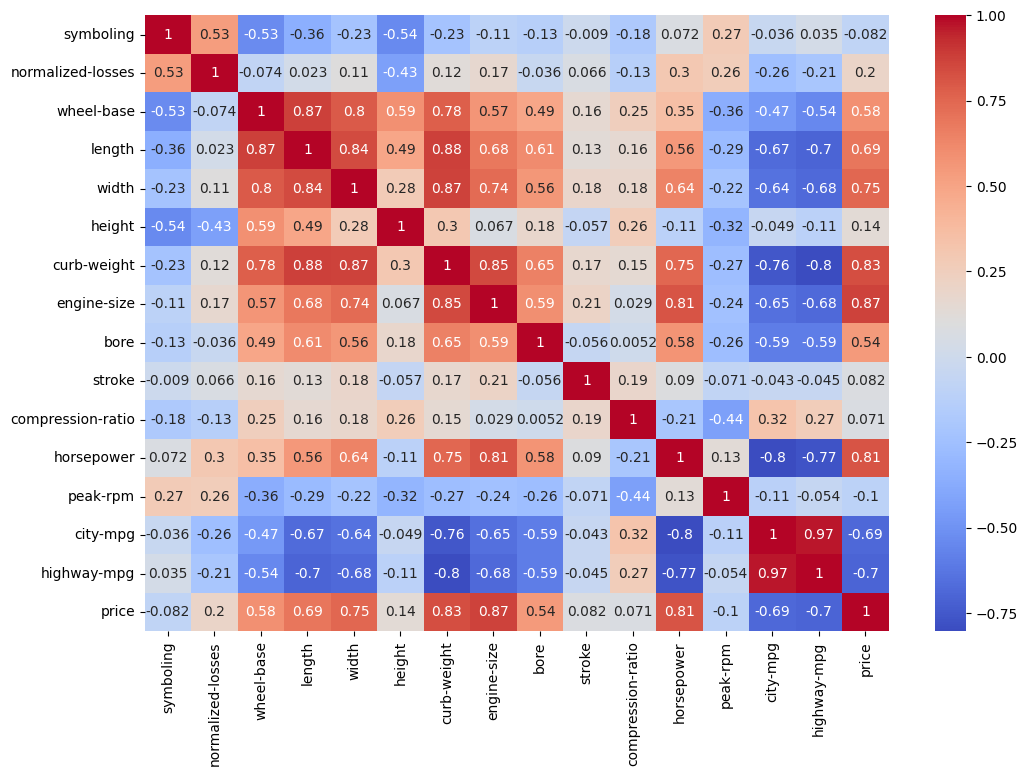

In [ ]:
# Display the first few records
data.head()

# Get dataset information
data.info()

# Describe the dataset
data.describe()

# Check for missing values
data.isnull().sum()

# Visualize the distribution of each feature
data.hist(bins=30, figsize=(20, 15))
plt.show()

# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


3. Data preprocessing

In [ ]:
# Fill missing values
data.loc[:, "normalized-losses"].fillna(data["normalized-losses"].mean(), inplace=True)
data.loc[:, "bore"].fillna(data["bore"].mean(), inplace=True)
data.loc[:, "stroke"].fillna(data["stroke"].mean(), inplace=True)
data.loc[:, "horsepower"].fillna(data["horsepower"].mean(), inplace=True)
data.loc[:, "peak-rpm"].fillna(data["peak-rpm"].mean(), inplace=True)
data.loc[:, "num-of-doors"].fillna(data["num-of-doors"].mode()[0], inplace=True)

# Convert categorical features to numerical features
data["make"] = data["make"].astype("category").cat.codes
data["fuel-type"] = data["fuel-type"].astype("category").cat.codes
data["aspiration"] = data["aspiration"].astype("category").cat.codes
data["num-of-doors"] = data["num-of-doors"].astype("category").cat.codes
data["body-style"] = data["body-style"].astype("category").cat.codes
data["drive-wheels"] = data["drive-wheels"].astype("category").cat.codes
data["engine-location"] = data["engine-location"].astype("category").cat.codes
data["engine-type"] = data["engine-type"].astype("category").cat.codes
data['num-of-cylinders'] = data['num-of-cylinders'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})
data["fuel-system"] = data["fuel-system"].astype("category").cat.codes

# Drop rows with missing prices
data.dropna(subset=["price"], inplace=True)

# Split the dataset into features and target variable
X = data.drop("price", axis=1)
y = data["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



4. Building the machine learning model

In [ ]:
# Create a linear regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)


LinearRegression()

5. Evaluating the model

In [ ]:
# Make predictions using the test set
y_pred = lr_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


Mean Squared Error: 17808264.56477749
R-squared score: 0.8544443460495549


6. Final model and prediction

In [ ]:
# Final model
final_model = lr_model

# Make predictions using the final model
final_predictions = final_model.predict(X_test)

# Output the first 10 predictions
print("First 10 predictions:\n", final_predictions[:10])

# Calculate and output evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, final_predictions)
mae = mean_absolute_error(y_test, final_predictions)
r2 = r2_score(y_test, final_predictions)

print("\nEvaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)


First 10 predictions:
 [ 7791.16141169 23518.74313551  6413.03849265  6322.08159449
 13090.48281362  5098.52341406 27983.84909616 10560.89771848
 18553.22270733 29018.04240378]

Evaluation Metrics:
Mean Squared Error (MSE): 17808264.56477749
Mean Absolute Error (MAE): 2798.5208730143445
R-squared: 0.8544443460495549
